In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [14]:

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")
df.head()
df.head(df.shape[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,X,Y,LABEL
0,95,-82,3
1,-80,86,2
2,66,48,3
3,-74,-28,0
4,24,-99,4
...,...,...,...
495,5,8,4
496,-74,32,1
497,53,73,3
498,-35,59,2


In [15]:
def normalize(input):
  if input == 0:
    return [1,0,0,0,0]
  elif input == 1:
    return [0,1,0,0,0]
  elif input == 2:
    return [0,0,1,0,0]
  elif input == 3:
    return [0,0,0,1,0]
  elif input == 4:
    return [0,0,0,0,1]

In [16]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

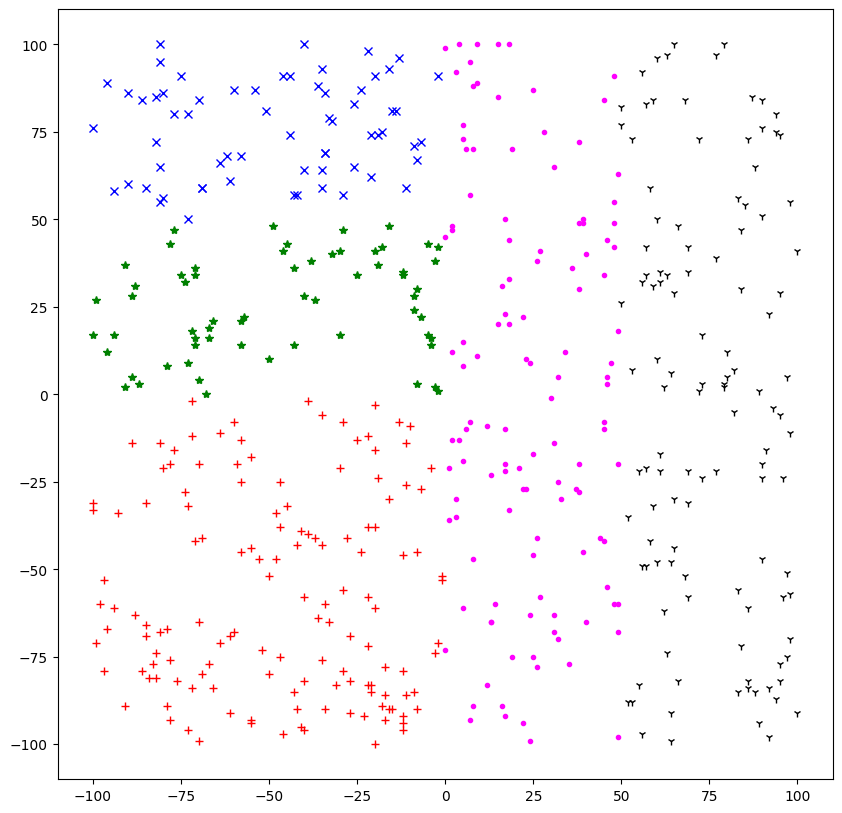

In [17]:
plt.figure(figsize=(10,10))
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], c="red", marker="+")
    elif Y[i] == 1:
        plt.plot(X1[i], X2[i], c="green", marker="*")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], c="blue", marker="x")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], c="black", marker="1")
    elif Y[i] == 4:
        plt.plot(X1[i], X2[i], c="magenta", marker=".")
plt.show()

In [18]:
features = list(zip(X1, X2))

features_np = np.array(features)


Y2 = np.array([normalize(i) for i in Y])


features_train = features_np[:400]
Y2_train = Y2[:400]

features_test = features_np[400:]
Y2_test = Y2[400:]

Neural Network - Training & testing

Epoch: 0, error: 0.16095335214242015
Epoch: 10000, error: 0.04920022387146082
Epoch: 20000, error: 0.04847349063087411
Epoch: 30000, error: 0.05245175095571612
Epoch: 40000, error: 0.04765018090418742
Epoch: 50000, error: 0.04731797199751807
Epoch: 60000, error: 0.049491541870000655
Epoch: 70000, error: 0.049627063363328436
Epoch: 80000, error: 0.049008044114460046
Epoch: 90000, error: 0.04401638949970794


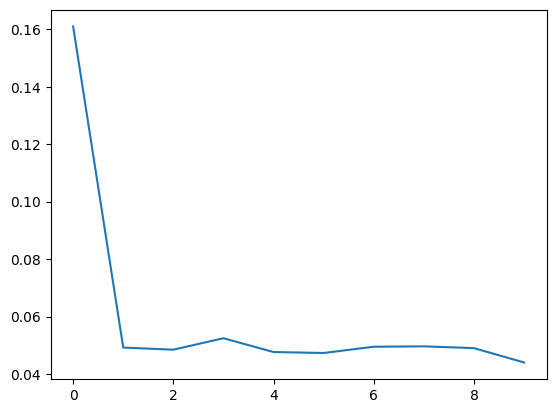

In [12]:
class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons = 2, hidden1LayerNeurons = 20, hidden2LayerNeurons = 20, hidden3LayerNeurons = 20, outLayerNeurons = 5, learning_rate = 0.01, activation_type: str = 'sigmoid'):

        self.activation_type = activation_type
        self.learning_rate = learning_rate

        # random weight initialization
        self.W_H1I = np.random.randn(inputLayerNeurons, hidden1LayerNeurons)
        self.W_H2H1 = np.random.randn(hidden1LayerNeurons, hidden2LayerNeurons)
        self.W_H3H2 = np.random.randn(hidden2LayerNeurons, hidden3LayerNeurons)
        self.W_OH3 = np.random.randn(hidden3LayerNeurons, outLayerNeurons)

        # random bias initialization
        self.biases = [
            np.random.randn(hidden1LayerNeurons),
            np.random.randn(hidden2LayerNeurons),
            np.random.randn(hidden3LayerNeurons),
            np.random.randn(outLayerNeurons)
        ]

    def activation(self, x, der=False):
        if self.activation_type == 'sigmoid':
            if der == True:
                return np.exp(-x) / (1 + np.exp(-x))**2 # return x * (1-x)
            else:
                return 1 / (1 + np.exp(-x)) # 1 / (1 + e^-x)

        if self.activation_type == "tanh":
            if der == True:
                return 1 - (np.tanh(x))**2 # 1 - (tanh(x))^2
            else:
                return np.tanh(x)

        if self.activation_type == "relu":
            if der == True:
                return np.where(x > 0, 1, 0)
            else:
                return np.maximum(0, x)

        if self.activation_type == "gaussian":
            if der == True:
                return -(2 * x * np.exp(-x**2)) # -2xe^(-x^2)
            else:
                return np.exp(-x**2)  # e^(-x^2)

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I) + self.biases[0]
        self.hidden1_output = self.activation(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1) + self.biases[1]
        self.hidden2_output = self.activation(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H3H2) + self.biases[2]
        self.hidden3_output = self.activation(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_OH3) + self.biases[3]
        pred = self.activation(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.activation(pred, der=True)

        hidden3_error = output_delta.dot(self.W_OH3.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.activation(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.activation(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.activation(self.hidden1_output, der=True)

        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3H2 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_OH3 += self.hidden3_output.T.dot(output_delta)

        self.biases[0] += self.learning_rate * np.sum(hidden1_delta, axis=0)
        self.biases[1] += self.learning_rate * np.sum(hidden2_delta, axis=0)
        self.biases[2] += self.learning_rate * np.sum(hidden3_delta, axis=0)
        self.biases[3] += self.learning_rate * np.sum(output_delta, axis=0)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)


NN = NeuralNetwork(activation_type = 'sigmoid')
#NN = NeuralNetwork(activation_type ='tanh')
#NN = NeuralNetwork(activation_type = 'gaussian')
#NN = NeuralNetwork(activation_type = 'relu')

err_list = []

for i in range(100000):
    NN.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

In [19]:
# stores a dict with the probability of each class with its class name

def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}

In [20]:
# returns the dict key with the highest probablity

def getClass(dict):
  max_key = max(dict, key=dict.get)
  return (max_key)

In [21]:
# testing a random input

pred = NN.feedForward([75,-33])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[3.39016560e-09 2.27731395e-06 4.30817498e-09 4.39162102e-01
 6.93597097e-01]
{'Class-0': np.float64(3.3901655980284624e-07), 'Class-1': np.float64(0.00022773139450394146), 'Class-2': np.float64(4.3081749836513734e-07), 'Class-3': np.float64(43.916210220414285), 'Class-4': np.float64(69.35970965121912)}
Class-4


Performance Metrics

In [22]:
predictions = NN.feedForward(features_test)
#print(f"Predictions: {predictions}")

# Calculate recall and F1 score
Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true, Y_pred, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true, Y_pred, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true, Y_pred, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.76
Precision for each class:
Class 0: 1.0
Class 1: 0.8
Class 2: 0.8461538461538461
Class 3: 0.5185185185185185
Class 4: 0.6842105263157895
Recall: 0.7698412698412698
F1 Score overall: 0.7610727969348658


In [23]:
# f1 score fr each class

f1_scores = f1_score(Y_true, Y_pred, average=None)

print("F1 Scores for each class:")
for i, score in enumerate(f1_scores):
    print(f"Class {i}: {score}")

F1 Scores for each class:
Class 0: 0.9629629629629629
Class 1: 0.8275862068965517
Class 2: 0.8148148148148148
Class 3: 0.6222222222222222
Class 4: 0.5777777777777777


# Documentation
**Modifications made:**

outLayerNeurons value changed from 1 to 5 for accomodating 5 seperate classes.
Added a variable to hold the 2nd and 3rd hidden layer neuron counts: hidden2LayerNeurons & hidden2LayerNeurons respectively.
Additional 2 weight matrices were introduced to handle the weights between Hidden1-Hidden2 & Hidden2-Hidden3 connections: W_H2H1, W_H3H2.
For handling biases a biases list was constructed, which contained lists of varying sizes, where the sizes vary with the number of neurons in each layer.
Added 3 more activation functions, tanh, reLU & gaussian for testing purposes. reLU proved the least effective due to out dataset having a huge amount of negatice input features.
During forward propagation, 4 new calculated terms were needed, hidden2_input, hidden2_output, hidden3_input, hidden3_output. These were added for the additional 2 hidden layers to the network.
In the same way, during backpropagation, hidden3_error, hidden2_error, hidden3_delta, hidden2_delta were introduced. Due to our new addition of baises, they also needed to be adjusted accordingly.

**Challenges:**

Vanishing Gradients: With raw inputs ranging from -100 to 100, the Sigmoid function pushes values to 0 or 1 immediately, causing gradients to become extremely small. This required a high number of epochs (100,000) to converge.
Matrix Dimensions: ensuring dot products between layers matched correctly (e.g., Layer 2 Output 20 x 1 dot Layer 3 Weights 20 x 20) required careful debugging.

Result & Analysis

In [24]:
# confusion matrix

def conf(Y_true, Y_pred, c = 'Blues'):
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=c)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [25]:
# ROC graph

def roc_plot(Y2_test, Y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(Y2_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(Y2_test[:, i], Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #ROC curve for each class
    for i in range(Y2_test.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [26]:
predictions = NN.feedForward(features_test)

Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)


Confusion Matrix:
[[26  0  0  0  2]
 [ 0 12  2  0  0]
 [ 0  3 11  0  0]
 [ 0  0  0 14  4]
 [ 0  0  0 13 13]]


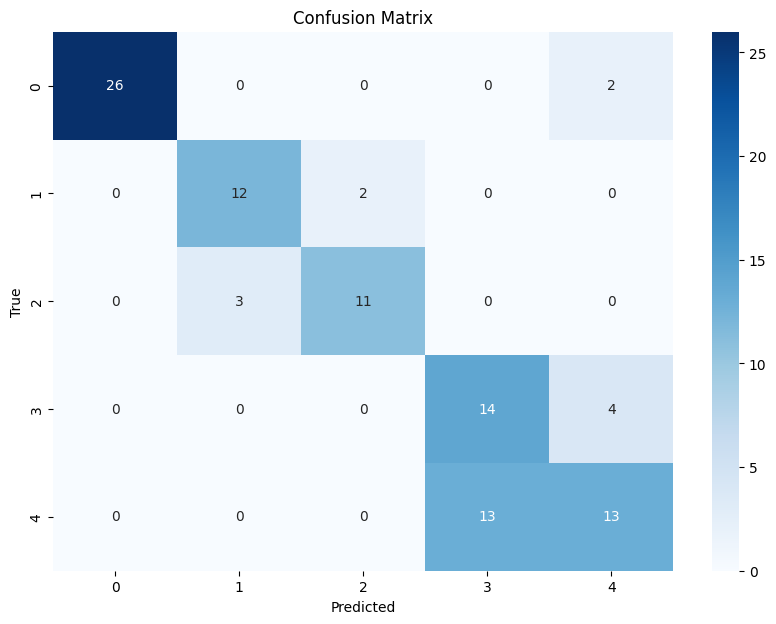

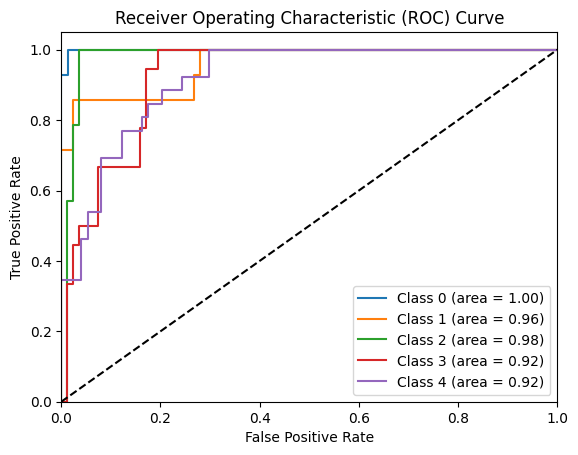

In [27]:
conf(Y_true, Y_pred , "Blues")

print()

roc_plot(Y2_test, predictions)

In [28]:
NN_1 = NeuralNetwork(inputLayerNeurons = 2, hidden1LayerNeurons = 60, hidden2LayerNeurons = 60, hidden3LayerNeurons = 60, outLayerNeurons = 5, learning_rate = 0.001, activation_type= 'sigmoid')

for i in range(100000):
    NN_1.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN_1.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

Epoch: 0, error: 0.4018653646512728
Epoch: 10000, error: 0.04428470427695571
Epoch: 20000, error: 0.04089099419911881
Epoch: 30000, error: 0.038935376869553735
Epoch: 40000, error: 0.03752663728975186
Epoch: 50000, error: 0.036401224145938854
Epoch: 60000, error: 0.035446210144070386
Epoch: 70000, error: 0.03460267767900149
Epoch: 80000, error: 0.03383649619460539
Epoch: 90000, error: 0.033126661675633225


In [29]:
predictions1 = NN_1.feedForward(features_test)

Y_true1 = np.argmax(Y2_test, axis=1)
Y_pred1 = np.argmax(predictions1, axis=1)

Confusion Matrix:
[[28  0  0  0  0]
 [ 0 11  2  0  1]
 [ 0  2 12  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  7 19]]


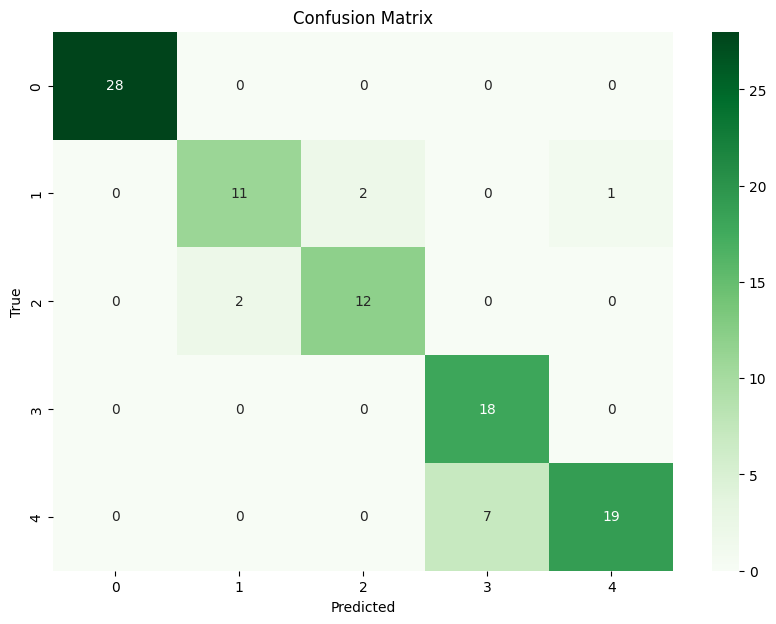

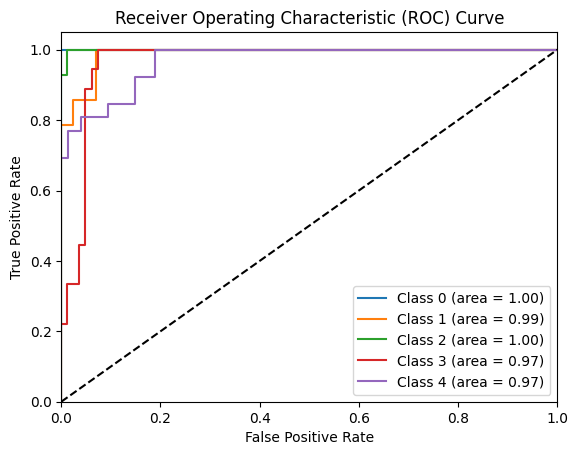

In [30]:
conf(Y_true1, Y_pred1, 'Greens')

print()

roc_plot(Y2_test, predictions1)

In [31]:
accuracy = accuracy_score(Y_true1, Y_pred1)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true1, Y_pred1, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true1, Y_pred1, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true1, Y_pred1, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.88
Precision for each class:
Class 0: 1.0
Class 1: 0.8461538461538461
Class 2: 0.8571428571428571
Class 3: 0.72
Class 4: 0.95
Recall: 0.8747252747252746
F1 Score overall: 0.8670507861609986


# **Conclusion**
**Summary:** Overall, our 3-hidden layer neural network was able to classify the input into 5 seperate classes with recall and F1 scores of above 0.74, when all hidden layers had 20 neurons each. The total accuracy achieved was 77% using only sigmoid as the activation. Our dataset was very small, with a training set of 400 combinations and 100 for testing.

**Challenges & Achievements**

Despite the simple dataset, the model may have been overfitted due to using too many neurons in the hidden layers and hence the accuracy may be low for testing data. By adjusting the learning rate and internel parameters, the model may perform better for larger datasets. As our dataset consisted of both negative and positive integers, tanh and sigmoid activations will perform the best as both of them limit the output to either [0, 1] or the [-1, 1] range. In this assignment we used sigmoid, as tanh had fluctuations in its total erros during training. Moreover since our output labels were 1-hot encoded, sigmoid performed decently.

**Improvements:** Rather than implementing simple patterns similar to our custom data, this model can also be used to classify images belonging to different classes. Since, images are stored as pixel values during runtime, we can use ReLU as the activation function, since pixels only have values in the range [0, 255]. ReLU is already implemented in the model but it performs poorly for our dataset due to us having negative values input features. Both learning rate and the hidden layer neuron counts can be experimented with to achieve the perfect balance